In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
# to scale the data using z-score
from scipy.stats import zscore
from scipy.spatial.distance import pdist 

cData = pd.read_csv("Nutrient+Composition+Dataset.csv")  

In [2]:
cData.shape

(1746, 6)

In [3]:
cData.head(10)

,S.No,Protein,Fat,vitaminC,Fiber,Product
0,1,-0.749825,0.426892,0.287212,1.279936,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.230835,-0.304578,-0.881972,-0.387079,Bacon and beef sticks
2,3,-0.060478,0.451551,2.450659,1.729280,"Apples, frozen, unsweetened, unheated (Include..."
3,4,-0.330121,-0.508314,-1.008903,-0.848201,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,-1.259850,-0.560451,-1.255896,-0.548145,"Alcoholic beverage, daiquiri, canned"
5,6,0.549775,-1.049436,-0.566616,-0.820785,"Alcoholic beverage, liqueur, coffee, 63 proof"
6,7,-0.910622,-0.351360,-0.559536,0.322276,"Alcoholic beverage, pina colada, canned"
7,8,-0.458005,0.509999,-0.913407,-0.359618,"Alcoholic beverage, tequila sunrise, canned"
8,9,-0.629847,0.551613,0.557541,-0.017446,"Apples, raw, without skin"
9,10,-0.516439,-1.311063,0.838666,-0.896243,"Alcoholic beverage, whiskey sour, canned"


In [4]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      1746 non-null   int64  
 1   Protein   1746 non-null   float64
 2   Fat       1746 non-null   float64
 3   vitaminC  1746 non-null   float64
 4   Fiber     1746 non-null   float64
 5   Product   1746 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 82.0+ KB


In [5]:
FEATURES_TO_DROP = ['S.No']
cData.drop(FEATURES_TO_DROP, axis=1, inplace=True)
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Protein   1746 non-null   float64
 1   Fat       1746 non-null   float64
 2   vitaminC  1746 non-null   float64
 3   Fiber     1746 non-null   float64
 4   Product   1746 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.3+ KB


In [6]:
'''
Input:
N/A

Output:
Go through each categorial column and print unique values for that column.

Retunrs:
N/A
'''
def CountUniqueValues(df, col_names):
    for col_name in col_names:
        print(f"======================='{col_name}'==================")
        for unique_col_value in  df[col_name].unique().tolist():
            total_count = df[col_name].count()
            unique_values_count = df[df[col_name] == unique_col_value][col_name].count()
            percentage = str(round((unique_values_count/total_count) * 100, 2))
            print(f"{unique_col_value} \t: {unique_values_count} ({percentage}%)")
        print(f"=========================================================\n")

In [7]:
'''
Input:
Target type and a list of feature names.

Output:
Convert all features provided in 'column_names' to Target type provided in 'toType'

Returns:
modifies main original data frame and returns nothing.
'''
def ConvertColTo(toType = "category", column_names=np.nan, df = np.nan):
    for col_name in column_names:
        df[col_name] = df[col_name].astype(toType)

In [8]:
ConvertColTo(toType = "category", column_names=['Product'], df = cData)
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Protein   1746 non-null   float64 
 1   Fat       1746 non-null   float64 
 2   vitaminC  1746 non-null   float64 
 3   Fiber     1746 non-null   float64 
 4   Product   1746 non-null   category
dtypes: category(1), float64(4)
memory usage: 96.9 KB


In [9]:
CountUniqueValues(cData, ['Product'])

======================='Product'==================
Amaranth leaves, cooked, boiled, drained, without salt 	: 1 (0.06%)
Bacon and beef sticks 	: 1 (0.06%)
Apples, frozen, unsweetened, unheated (Includes foods for USDA's Food Distribution Program) 	: 1 (0.06%)
Alcoholic beverage, beer, light, BUD LIGHT 	: 1 (0.06%)
Alcoholic beverage, daiquiri, canned 	: 1 (0.06%)
Alcoholic beverage, liqueur, coffee, 63 proof 	: 1 (0.06%)
Alcoholic beverage, pina colada, canned 	: 1 (0.06%)
Alcoholic beverage, tequila sunrise, canned 	: 1 (0.06%)
Apples, raw, without skin 	: 1 (0.06%)
Alcoholic beverage, whiskey sour, canned 	: 1 (0.06%)
Barbecue loaf, pork, beef 	: 1 (0.06%)
Applesauce, canned, sweetened, without salt 	: 1 (0.06%)
Alcoholic Beverage, wine, table, red, Cabernet Franc 	: 1 (0.06%)
Beef, Australian, imported, grass-fed, loin, tenderloin steak/roast, boneless, separable lean and fat, raw 	: 1 (0.06%)
Apricots, canned, heavy syrup pack, with skin, solids and liquids 	: 1 (0.06%)
Alcoholic Be

Cheese, cottage, nonfat, uncreamed, dry, large or small curd 	: 1 (0.06%)
Lamb, Australian, imported, fresh, foreshank, separable lean only, trimmed to 1/8" fat, raw 	: 1 (0.06%)
Cheese, cream 	: 1 (0.06%)
Fish, wolffish, Atlantic, raw 	: 1 (0.06%)
Lamb, Australian, imported, fresh, leg, center slice, bone-in, separable lean and fat, trimmed to 1/8" fat, raw 	: 1 (0.06%)
Lamb, Australian, imported, fresh, leg, center slice, bone-in, separable lean only, trimmed to 1/8" fat, cooked, broiled 	: 1 (0.06%)
Fish, yellowtail, mixed species, cooked, dry heat 	: 1 (0.06%)
Focaccia, Italian flatbread, plain 	: 1 (0.06%)
Garlic bread, frozen 	: 1 (0.06%)
Cheese, feta 	: 1 (0.06%)
Cheese, mexican, queso chihuahua 	: 1 (0.06%)
Cheese, mozzarella, low moisture, part-skim 	: 1 (0.06%)
Cheese, mozzarella, whole milk 	: 1 (0.06%)
George Weston Bakeries, Brownberry Sage and Onion Stuffing Mix, dry 	: 1 (0.06%)
Gravy, beef, canned, ready-to-serve 	: 1 (0.06%)
Gravy, brown instant, dry 	: 1 (0.06%)
Heinz

Rowal, raw 	: 1 (0.06%)
Sesbania flower, raw 	: 1 (0.06%)
Sorghum flour, whole-grain 	: 1 (0.06%)
Sour dressing, non-butterfat, cultured, filled cream-type 	: 1 (0.06%)
Soybeans, green, cooked, boiled, drained, without salt 	: 1 (0.06%)
Soybeans, green, raw 	: 1 (0.06%)
Soybeans, mature seeds, sprouted, cooked, steamed 	: 1 (0.06%)
Spices, anise seed 	: 1 (0.06%)
Spices, bay leaf 	: 1 (0.06%)
Spices, caraway seed 	: 1 (0.06%)
Spices, cinnamon, ground 	: 1 (0.06%)
Spices, curry powder 	: 1 (0.06%)
Spices, ginger, ground 	: 1 (0.06%)
Spices, mace, ground 	: 1 (0.06%)
Spices, marjoram, dried 	: 1 (0.06%)
Spices, mustard seed, ground 	: 1 (0.06%)
Spices, nutmeg, ground 	: 1 (0.06%)
Spices, savory, ground 	: 1 (0.06%)
Spices, tarragon, dried 	: 1 (0.06%)
Spices, thyme, dried 	: 1 (0.06%)
Spices, turmeric, ground 	: 1 (0.06%)
Spinach, canned, regular pack, solids and liquids 	: 1 (0.06%)
Spinach, raw 	: 1 (0.06%)
Squash, summer, crookneck and straightneck, frozen, cooked, boiled, drained, wi

In [10]:
cData['Product'].value_counts().sort_values()

Sausage, turkey, hot, smoked                                  1
Beans, black, mature seeds, raw                               1
Alcoholic beverage, wine, table, white, Chardonnay            1
Alcoholic Beverage, wine, table, red, Claret                  1
Alcoholic Beverage, wine, table, red, Lemberger               1
                                                           ... 
Yogurt, fruit, low fat, 11g protein/8 oz                      1
Veal, shank (fore and hind), separable lean and fat, raw      1
Bean, sporouted seeds                                        87
Chicken, broilers or fryers, raw                            284
Alcoholic beverage, wine, beer                              542
Name: Product, Length: 836, dtype: int64

In [11]:
cData.head(10)

,Protein,Fat,vitaminC,Fiber,Product
0,-0.749825,0.426892,0.287212,1.279936,"Amaranth leaves, cooked, boiled, drained, with..."
1,2.230835,-0.304578,-0.881972,-0.387079,Bacon and beef sticks
2,-0.060478,0.451551,2.450659,1.729280,"Apples, frozen, unsweetened, unheated (Include..."
3,-0.330121,-0.508314,-1.008903,-0.848201,"Alcoholic beverage, beer, light, BUD LIGHT"
4,-1.259850,-0.560451,-1.255896,-0.548145,"Alcoholic beverage, daiquiri, canned"
5,0.549775,-1.049436,-0.566616,-0.820785,"Alcoholic beverage, liqueur, coffee, 63 proof"
6,-0.910622,-0.351360,-0.559536,0.322276,"Alcoholic beverage, pina colada, canned"
7,-0.458005,0.509999,-0.913407,-0.359618,"Alcoholic beverage, tequila sunrise, canned"
8,-0.629847,0.551613,0.557541,-0.017446,"Apples, raw, without skin"
9,-0.516439,-1.311063,0.838666,-0.896243,"Alcoholic beverage, whiskey sour, canned"


In [12]:
cData.iloc[:,:4]

,Protein,Fat,vitaminC,Fiber
0,-0.749825,0.426892,0.287212,1.279936
1,2.230835,-0.304578,-0.881972,-0.387079
2,-0.060478,0.451551,2.450659,1.729280
3,-0.330121,-0.508314,-1.008903,-0.848201
4,-1.259850,-0.560451,-1.255896,-0.548145
...,...,...,...,...
1741,0.424120,1.676720,0.391732,0.858416
1742,2.238292,1.687965,0.724514,-1.355875
1743,-0.518927,-0.271354,0.210755,-1.029739
1744,-0.278244,1.296137,0.673087,0.031214


In [13]:
wsfsgs

NameError: name 'wsfsgs' is not defined

In [14]:
custDataAttr=cData.iloc[:,:5]
custDataAttr.head()

,Protein,Fat,vitaminC,Fiber,Product
0,-0.749825,0.426892,0.287212,1.279936,"Amaranth leaves, cooked, boiled, drained, with..."
1,2.230835,-0.304578,-0.881972,-0.387079,Bacon and beef sticks
2,-0.060478,0.451551,2.450659,1.729280,"Apples, frozen, unsweetened, unheated (Include..."
3,-0.330121,-0.508314,-1.008903,-0.848201,"Alcoholic beverage, beer, light, BUD LIGHT"
4,-1.259850,-0.560451,-1.255896,-0.548145,"Alcoholic beverage, daiquiri, canned"


In [15]:
custDataScaled=cData.iloc[:,:4].apply(zscore)
custDataScaled.head(10)

,Protein,Fat,vitaminC,Fiber
0,-0.749825,0.426892,0.287212,1.279936
1,2.230835,-0.304578,-0.881972,-0.387079
2,-0.060478,0.451551,2.450659,1.729280
3,-0.330121,-0.508314,-1.008903,-0.848201
4,-1.259850,-0.560451,-1.255896,-0.548145
5,0.549775,-1.049436,-0.566616,-0.820785
6,-0.910622,-0.351360,-0.559536,0.322276
7,-0.458005,0.509999,-0.913407,-0.359618
8,-0.629847,0.551613,0.557541,-0.017446
9,-0.516439,-1.311063,0.838666,-0.896243


In [16]:
custDataScaled.describe().T[['mean', 'std']]

,mean,std
Protein,-1.030104e-17,1.000286
Fat,-3.115746e-17,1.000286
vitaminC,-4.641826e-18,1.000286
Fiber,-9.537998e-18,1.000286


In [17]:
model = AgglomerativeClustering(affinity='euclidean',  linkage='ward')
model.fit(custDataScaled)

AgglomerativeClustering()

In [18]:
custDataAttr['labels'] = model.labels_
custDataAttr.head(10)

,Protein,Fat,vitaminC,Fiber,Product,labels
0,-0.749825,0.426892,0.287212,1.279936,"Amaranth leaves, cooked, boiled, drained, with...",0
1,2.230835,-0.304578,-0.881972,-0.387079,Bacon and beef sticks,1
2,-0.060478,0.451551,2.450659,1.729280,"Apples, frozen, unsweetened, unheated (Include...",0
3,-0.330121,-0.508314,-1.008903,-0.848201,"Alcoholic beverage, beer, light, BUD LIGHT",0
4,-1.259850,-0.560451,-1.255896,-0.548145,"Alcoholic beverage, daiquiri, canned",0
5,0.549775,-1.049436,-0.566616,-0.820785,"Alcoholic beverage, liqueur, coffee, 63 proof",0
6,-0.910622,-0.351360,-0.559536,0.322276,"Alcoholic beverage, pina colada, canned",0
7,-0.458005,0.509999,-0.913407,-0.359618,"Alcoholic beverage, tequila sunrise, canned",1
8,-0.629847,0.551613,0.557541,-0.017446,"Apples, raw, without skin",1
9,-0.516439,-1.311063,0.838666,-0.896243,"Alcoholic beverage, whiskey sour, canned",0


In [24]:
custDataAttr['Product'].value_counts().sort_values()

Sausage, turkey, hot, smoked                                  1
Beans, black, mature seeds, raw                               1
Alcoholic beverage, wine, table, white, Chardonnay            1
Alcoholic Beverage, wine, table, red, Claret                  1
Alcoholic Beverage, wine, table, red, Lemberger               1
                                                           ... 
Yogurt, fruit, low fat, 11g protein/8 oz                      1
Veal, shank (fore and hind), separable lean and fat, raw      1
Bean, sporouted seeds                                        87
Chicken, broilers or fryers, raw                            284
Alcoholic beverage, wine, beer                              542
Name: Product, Length: 836, dtype: int64

In [ ]:
ascasc

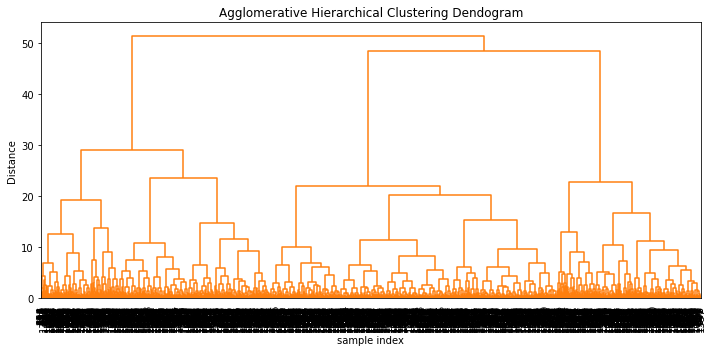

In [25]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [ ]:
adasda

In [ ]:
custDataClust = custDataAttr.groupby(['labels'])

In [ ]:
custDataClust.mean()

In [ ]:
evaluation_metrics = [
    'braycurtis',
    'canberra',
    'chebyshev',
    'cityblock',
    'correlation',
    'cosine',
    'dice',
    'euclidean',
    'hamming',
    'jaccard',
    'jensenshannon',
    'kulsinski',
    'kulczynski1',
    'mahalanobis',
    'matching',
    'minkowski',
    'rogerstanimoto',
    'russellrao',
    'seuclidean',
    'sokalmichener',
    'sokalsneath',
    'sqeuclidean',
    'yule'
]

linkage_methods = [
    'single',
    'average',
    'complete',
    'ward',
    'weighted',
    'centroid'
]

scores = pd.DataFrame(index=evaluation_metrics, columns=linkage_methods)

In [ ]:
def PlotDendrogram(transformed_df, linkage_metric, linkage_method):
    clustering_linkage_matrix = linkage(
        y      = transformed_df,
        metric = linkage_metric,
        method = linkage_method)
    
    corr_dist, coph_dists = cophenet(clustering_linkage_matrix , pdist(transformed_df))
#     print(f"Distance ({linkage_metric}, {linkage_method}) \t: {corr_dist}")
    
    plt.figure(figsize=(15, 15))
    plt.title('Agglomerative Hierarchical Clustering Dendogram')
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    dendrogram(clustering_linkage_matrix, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8., orientation="right" )
#     plt.tight_layout()
    return corr_dist

In [ ]:
top_score = -1
best_model = ""
for evaluation_metric in evaluation_metrics:
    for linkage_method in linkage_methods:
        try:
            scores.at[evaluation_metric, linkage_method] = PlotDendrogram(
                transformed_df = custDataScaled,
                linkage_metric = evaluation_metric,
                linkage_method = linkage_method)
            if scores.at[evaluation_metric, linkage_method] > top_score:
                top_score  = scores.at[evaluation_metric, linkage_method]
                best_model = f"Best Mode ({evaluation_metric} X {linkage_method}) with Score : {top_score}"
        except:
            scores.at[evaluation_metric, linkage_method] = -1
print(best_model)
scores

In [26]:
covMatrix = np.cov(custDataScaled,rowvar=False)
print(covMatrix)

[[1.00057307 0.38253077 0.02540316 0.04384809]
 [0.38253077 1.00057307 0.04829969 0.06811834]
 [0.02540316 0.04829969 1.00057307 0.36167341]
 [0.04384809 0.06811834 0.36167341 1.00057307]]


In [27]:
pca = PCA(n_components=4)
pca.fit(custDataScaled)

PCA(n_components=4)

In [28]:
print(pca.explained_variance_)

[1.46663112 1.2799764  0.63842786 0.61725689]


In [29]:
print(pca.components_)

[[ 0.5136229   0.53984503  0.45922822  0.48359933]
 [ 0.49012979  0.45263957 -0.54059078 -0.51249568]
 [ 0.04389671 -0.00722082  0.70488588 -0.70792431]
 [-0.70287794  0.70967078  0.00263582 -0.04819792]]


In [30]:
print(pca.explained_variance_ratio_)

[0.36644778 0.31981083 0.15951555 0.15422584]


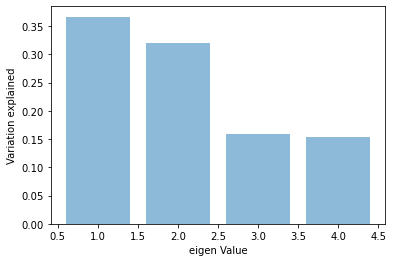

In [35]:
plt.bar(list(range(1,5)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (6,) and (4,)

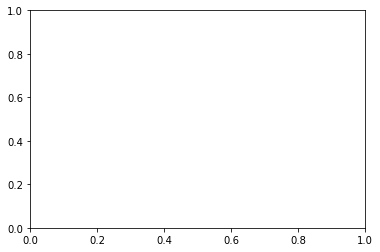

In [32]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
pca3 = PCA(n_components=3)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

In [ ]:
Xpca3

In [ ]:
sns.pairplot(pd.DataFrame(Xpca3))
